In [1]:
import pandas as pd
import glob
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

C:\Users\sars1\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sars1\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:

def load_all_data_files(directory_path):
    # Define the file patterns for XLS and CSV files
    file_patterns = [directory_path + "/*.csv", directory_path + "/*.xls", directory_path + "/*.xlsx"]
    no_files=0
    # List to hold all DataFrames
    dataframes = []
    
    # Loop through each file pattern
    for pattern in file_patterns:
        # Find all files that match the pattern
        for file in glob.glob(pattern):
            no_files+=1
            if file.endswith('.csv'):
                # Load CSV file
                df = pd.read_csv(file)
            else:
                # Load Excel file
                df = pd.read_excel(file)
            # Append the DataFrame to the list
            dataframes.append(df)
            
    
    # Concatenate all DataFrames
    if dataframes:
        all_data = pd.concat(dataframes, ignore_index=True)
        
    else:
        all_data = pd.DataFrame()  # Empty DataFrame if no files are found
    print(no_files)
    return all_data


In [3]:
directory_path = r"E:\card data" 
try:
    data = load_all_data_files(directory_path)
except Exception as e:
    print(e)
#print(data)
data1=data.copy()

121


In [4]:
#data1=data.copy()
data=data[['TRANS DATE','CARD NUMBER','MERCHANT NAME','ORIGINAL GROSS AMT']]
data = data.dropna(subset=['CARD NUMBER'])

data.head()

,TRANS DATE,CARD NUMBER,MERCHANT NAME,ORIGINAL GROSS AMT
151,2022-09-22T00:00:00,************6208,vauxhall road fuel exp,100.0
152,2022-09-26T00:00:00,************1253,furniture resource cen,212.4
153,2022-09-26T00:00:00,************1253,furniture resource cen,276.04
154,2022-09-28T00:00:00,************3982,deliveroo,20.24
155,2022-09-05T00:00:00,************0140,weoley castle,99.97


In [5]:

data= data.dropna(subset=['CARD NUMBER'])

# Get value counts of 'CARD NUMBER'
value_counts = data['CARD NUMBER'].value_counts()

# Filter values with count >= 10
frequent_card_numbers = value_counts[value_counts >= 1000].index

# Filter DataFrame based on frequent card numbers
data = data[data['CARD NUMBER'].isin(frequent_card_numbers)]
data['CARD NUMBER'].value_counts()



data['CARD NUMBER'] = data['CARD NUMBER'].apply(lambda x: str(x)[-4:] if isinstance(x, str) else x % 10000)
data['CARD NUMBER']=data['CARD NUMBER'].astype(int)

In [6]:
# Feature Engineering: Aggregate data by month and category
#label_encoder = LabelEncoder()
#data['MERCHANT NAME'] = label_encoder.fit_transform(data['MERCHANT NAME'])
data.head()

,TRANS DATE,CARD NUMBER,MERCHANT NAME,ORIGINAL GROSS AMT
285,2022-08-31T00:00:00,7784,tgc key hill,72.8
286,2022-09-13T00:00:00,7784,tgc key hill,95.01
287,2022-09-13T00:00:00,7784,tgc key hill,95.3
288,2022-09-13T00:00:00,7784,tgc key hill,72.4
289,2022-09-13T00:00:00,7784,tgc key hill,79.45


In [7]:
data['TRANS DATE'] = pd.to_datetime(data['TRANS DATE'])
#data2['DayOfWeek'] = data2['TRANS DATE'].dt.dayofweek
#data['Day'] = data['TRANS DATE'].dt.day
#data['Year'] = data['TRANS DATE'].dt.year
#data['Month'] = data['TRANS DATE'].dt.month
#data['TRANS DATE'] = pd.to_datetime(data['TRANS DATE']).dt.date

In [10]:
#data2=data.copy()
import pandas as pd
#data = data2.dropna(subset=['MERCHANT NAME'])
# Example DataFrame for demonstration
data['MERCHANT NAME'].fillna('OTHERS', inplace=True) 

# Function to clean the 'MERCHANT NAME'
def clean_merchant_name(name):
    name = name.strip()  # Strip leading and trailing whitespace
    replacements = ['paypal ', '.co', '.uk', 'www.', ' ltd', ' limited']
    for rep in replacements:
        name = name.replace(rep, '')
    return name

# Apply the cleaning function
data['MERCHANT NAME'] = data['MERCHANT NAME'].apply(clean_merchant_name)

# Regular expression replacements
replacement_patterns = {
    r'amazon|am zon|amzn|amznmktplace|amz|azn': 'amazon',
    r'shell': 'shell',
    r'tesco': 'tesco',
    r'asda': 'asda',
    r'travelodge': 'travelodge',
    r'morrison': 'morrisons',
    r'holiday inn': 'holiday inn',
    r'argos': 'argos',
    r'farmfoods': 'farmfoods',
    r'halfords': 'halfords',
    r'kfc': 'kfc',
    r'boots': 'boots',
    r'lidl': 'lidl',
    r'aldi': 'aldi',
    r'costa': 'costa',
    r'poundland': 'poundland',
    r'primark': 'primark',
    r'greggs': 'greggs',
    r'marks|spencer': 'marks spencer',
    r'ebay': 'ebay',
    r'costco': 'costco',
    r'legoland': 'legoland',
    r'mcdonalds': 'mcdonalds',
    r'best one': 'best one',
    r'currys': 'currys',
    r'abebooks': 'abebooks',
    r'adobe': 'adobe',
    r'facebk': 'facebook',
    r'subway': 'subway',
    r'parking': 'parking',
    r'msft': 'msft',
    r'uber': 'uber',
    r'sainsbury': 'sainsburys'
}
# Apply the replacements
for pattern, replacement in replacement_patterns.items():
    data.loc[data['MERCHANT NAME'].str.contains(pattern, case=False, na=False), 'MERCHANT NAME'] = replacement
value_counts = data['MERCHANT NAME'].value_counts()
data['MERCHANT NAME'] = data['MERCHANT NAME'].apply(lambda x: 'others' if value_counts[x] == 1 else x)

C:\Users\sars1\AppData\Local\Temp/ipykernel_3136/1326889014.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MERCHANT NAME'].fillna('OTHERS', inplace=True)


In [11]:
data['MERCHANT NAME'].value_counts()

MERCHANT NAME
amazon                       21276
travelodge                    9025
others                        4486
asda                          3546
parking                       3483
britishgas.                   2058
tesco                         1823
post office counter           1195
sainsburys                    1161
water plus                    1131
OTHERS                         979
morrisons                      961
civil justice cent             771
e.on energy solutions          730
argos                          688
holiday inn                    679
npower                         670
bcc clean air zone             665
js online grocery              639
uber                           524
costa                          507
waterplus select               490
mcdonalds                      471
m6 toll                        415
shell                          391
opusenergym                    390
great barr sawmills            389
newey  eyre                    380
toolst

In [12]:
#=data2.copy()
data['TRANS DATE']=pd.to_datetime(data['TRANS DATE'])
#f['TRANS DATE'] = f.groupby('CARD NUMBER')['TRANS DATE'].transform('value')
data = data.sort_values(by= ['TRANS DATE'])
#f.head(50)

In [13]:
d=data.copy()

In [14]:


data['TRANS DATE'] = pd.to_datetime(data['TRANS DATE'])

data=data[(data['TRANS DATE'] >= pd.Timestamp(2020,1,1))]
data= data[data['ORIGINAL GROSS AMT'] > 0]
data= data[data['ORIGINAL GROSS AMT'] < 1000]
data.head(10)

,TRANS DATE,CARD NUMBER,MERCHANT NAME,ORIGINAL GROSS AMT
185896,2020-01-01,2388,uber,14.13
185241,2020-01-02,4244,others,36.0
185944,2020-01-02,4471,ee,179.2
185166,2020-01-02,6158,others,125.0
184409,2020-01-02,7784,tgc key hill,70.01
185380,2020-01-02,3195,sainsburys,86.03
185381,2020-01-02,3195,doorfit products,116.62
184411,2020-01-02,7784,tgc key hill,56.05
184410,2020-01-02,7784,tgc key hill,69.6
184904,2020-01-02,3179,yesss electrical,66.71


In [15]:
data.to_csv('data.csv', index=False)

In [32]:
data.head()

,TRANS DATE,CARD NUMBER,MERCHANT NAME,ORIGINAL GROSS AMT
185896,2020-01-01,2388,uber,14.13
185241,2020-01-02,4244,others,36.0
185944,2020-01-02,4471,ee,179.2
185166,2020-01-02,6158,others,125.0
184409,2020-01-02,7784,tgc key hill,70.01


In [16]:
data.shape

(42526, 4)

In [18]:
data2=data.copy()
data2['PREV_TRANS_DATE'] = data2.groupby('CARD NUMBER')['TRANS DATE'].shift(1)
data2['DATE_DIFF'] = (data2['TRANS DATE'] - data2['PREV_TRANS_DATE']).dt.days
data2.head(10)

,TRANS DATE,CARD NUMBER,MERCHANT NAME,ORIGINAL GROSS AMT,PREV_TRANS_DATE,DATE_DIFF
185896,2020-01-01,2388,uber,14.13,NaT,NaN
185241,2020-01-02,4244,others,36.0,NaT,NaN
185944,2020-01-02,4471,ee,179.2,NaT,NaN
185166,2020-01-02,6158,others,125.0,NaT,NaN
184409,2020-01-02,7784,tgc key hill,70.01,NaT,NaN
185380,2020-01-02,3195,sainsburys,86.03,NaT,NaN
185381,2020-01-02,3195,doorfit products,116.62,2020-01-02,0.0
184411,2020-01-02,7784,tgc key hill,56.05,2020-01-02,0.0
184410,2020-01-02,7784,tgc key hill,69.6,2020-01-02,0.0
184904,2020-01-02,3179,yesss electrical,66.71,NaT,NaN


In [19]:
data['CARD NUMBER'].value_counts().count()

56

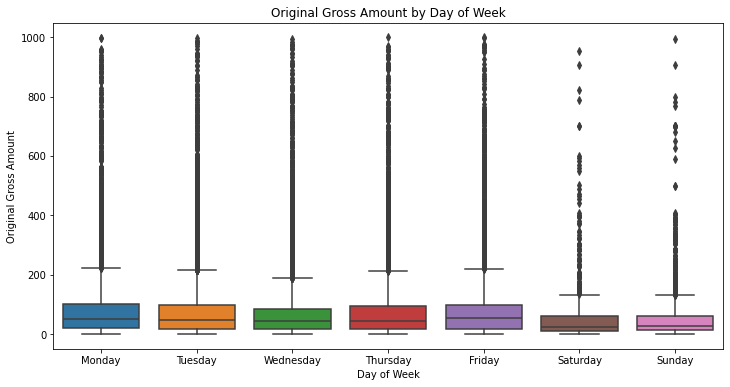

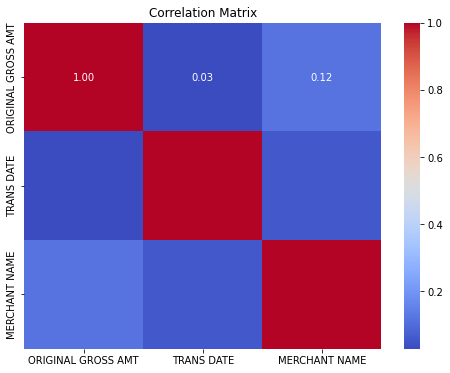

In [30]:
# 4. Transaction Date Analysis (Weekly Trend)
from sklearn.preprocessing import LabelEncoder
df['Day of Week'] = df['TRANS DATE'].dt.day_name()
le=LabelEncoder()
df['MERCHANT NAME']=le.fit_transform(df['MERCHANT NAME'])
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day of Week', y='ORIGINAL GROSS AMT', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Original Gross Amount by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Original Gross Amount')
plt.show()

# 5. Correlation Matrix
corr_matrix = df[['ORIGINAL GROSS AMT', 'TRANS DATE','MERCHANT NAME']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [31]:

grouped_data = df.groupby('CARD NUMBER')
df.fillna(method='ffill', inplace=True) 
# Calculate correlation matrices for each group
corr_matrices = []
for _, group in grouped_data:
    corr_matrix = group[['TRANS DATE', 'MERCHANT NAME','ORIGINAL GROSS AMT']].corr()
    corr_matrices.append(corr_matrix)
stacked_corr_matrices = np.dstack(corr_matrices)
# Calculate average correlation matrix
mean_corr_matrix = np.mean(stacked_corr_matrices , axis=2) 
mean_corr_matrix
print(np.round(mean_corr_matrix,3))

C:\Users\sars1\AppData\Local\Temp/ipykernel_3136/1808983164.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


[[1.      nan 0.028]
 [  nan   nan   nan]
 [0.028   nan 1.   ]]
